In [6]:
# imports

import torch
from IPython.display import Image

# Calculating gradients in PyTorch

In [10]:
x = torch.randn(3, requires_grad=True)
print(x)

tensor([-0.0539,  0.1652, -1.9143], requires_grad=True)


In [11]:
y = x + 2

This will create a computational graph which looks like this:

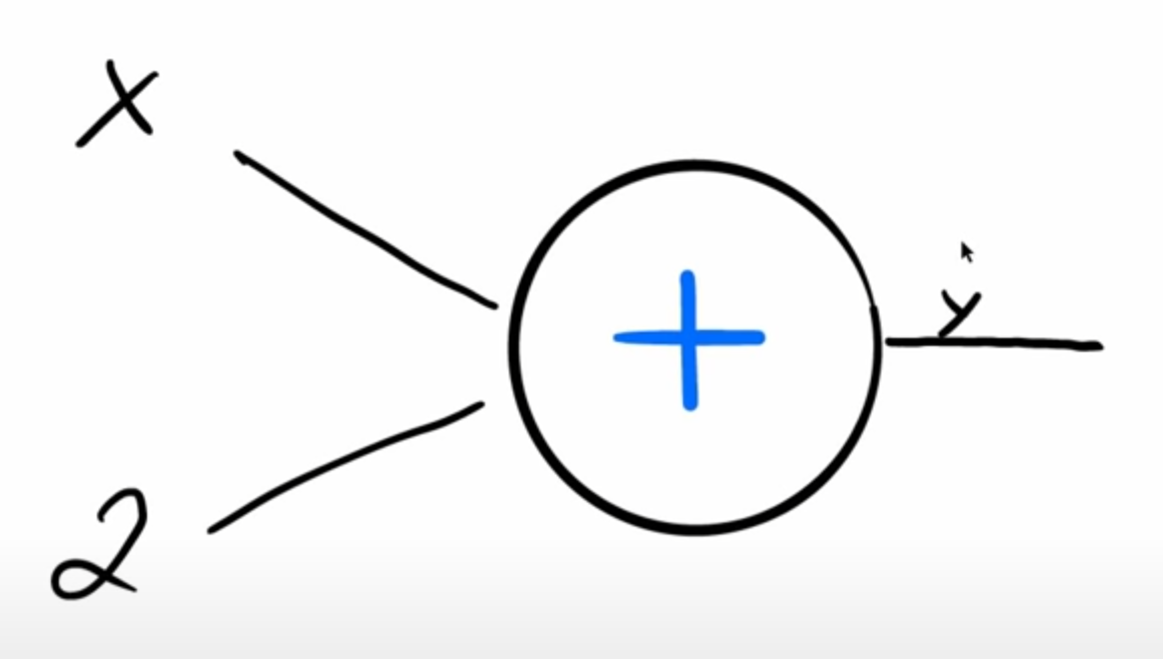

In [12]:
image_path = 'data/grad_1.png'
Image(filename=image_path)

For each operation we have a note with inputs and an output. Here the operation is addition (+), inputs are x and 2, 
output is y. Using method called backpropagation we ca calculate the gradients. Simple explanation of the usage of 
the algorithm introduced on the picture below:

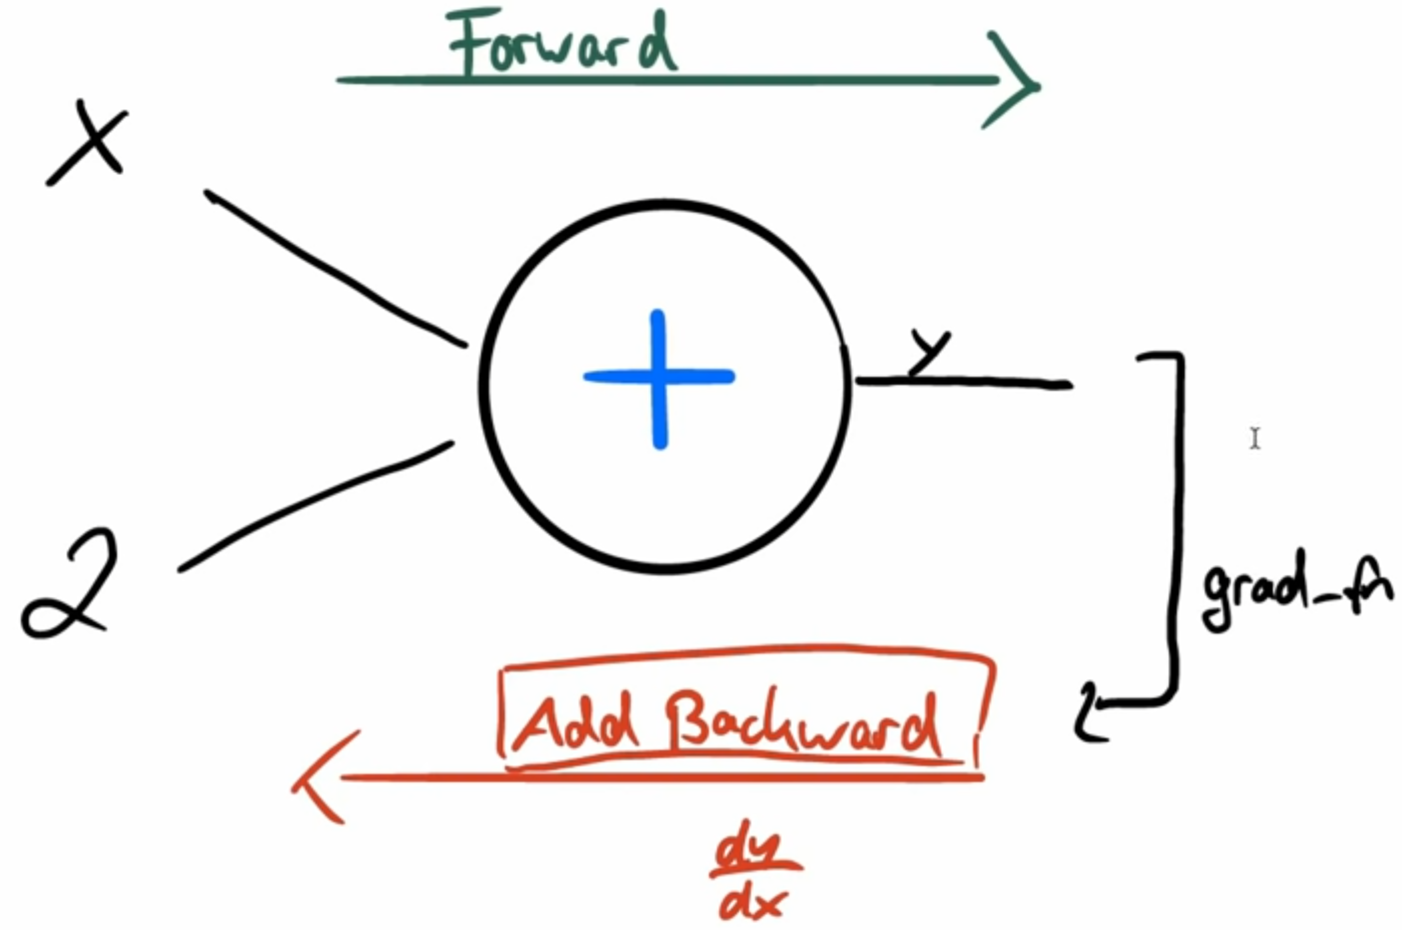

In [23]:
image_path = 'data/grad_2.png'
Image(filename=image_path)

1) Forward pass: we calculate the output $y$ according to the operation (+)
2) PyTorch will automatically create backpropagation function (Add Backward) to get the gradients, 
    so y have an attribute underscore $grad_f_n$. This will point to gradient function. That's 
    why it's called `Add Backward`
3) This function will calculate the gradient of $y$

So, by printing $y$ we will see exactly this $grad_f_n$ attribute

In [14]:
print(y)

tensor([1.9461, 2.1652, 0.0857], grad_fn=<AddBackward0>)


Lets practice with another function

In [20]:
z = y * y * 2
print(z)

tensor([7.5749, 9.3758, 0.0147], grad_fn=<MulBackward0>)


`MulBackward` cause we're multiplying elements

In [21]:
z = z.mean()
print(z)

tensor(5.6552, grad_fn=<MeanBackward0>)


`MeanBackward` has only 1 value cause it calculates the average value

In [22]:
z.backward() # dz/dx
print(x.grad)

tensor([5.1897, 5.7738, 0.2285])


* It's important to understand that we used `mean` function to make a scalar value, cause it's the only way here 
to use backward function

In [29]:
z = y * y * 2
print(z)

tensor([7.5749, 9.3758, 0.0147], grad_fn=<MulBackward0>)


In [25]:
z.backward() # dz/dx
print(x.grad)

RuntimeError: grad can be implicitly created only for scalar outputs

Here we catch an Error cause used scalar in backward function while working with tensor. To avoid the 
error, let's use the vector instead

In [30]:
v = torch.tensor([0.1, 1.0, 0.001], dtype=torch.float32)
z.backward(v)
print(x.grad)

tensor([ 6.7466, 23.0951,  0.2292])


Code below sets `requires_grad` parameter to False value:

In [32]:
# x.requires_grad_(False)
# x.detach()
# with torch.no_grad():

x = torch.randn(3, requires_grad=True)
print(x)
x.requires_grad_(False)
print(x)

# '_' char after function means that the value will be unplaced

tensor([-0.1610, -0.2823,  1.7300], requires_grad=True)
tensor([-0.1610, -0.2823,  1.7300])


Code below creates new vector $y$ with `requires_grad` parameter set to False value:

In [33]:
x = torch.randn(3, requires_grad=True)
print(x)
y = x.detach()
print(y)

tensor([ 0.1309, -3.0917,  1.0862], requires_grad=True)
tensor([ 0.1309, -3.0917,  1.0862])


Create tensor with grad function:

In [35]:
y = x + 2
print(y)

tensor([2.0713, 2.1225, 1.3141], grad_fn=<AddBackward0>)


If we want to delete the function use the code below:

In [34]:
x = torch.randn(3, requires_grad=True)
print(x)
with torch.no_grad():
    y = x + 2
    print(y)

tensor([ 0.0713,  0.1225, -0.6859], requires_grad=True)
tensor([2.0713, 2.1225, 1.3141])


In [40]:
weights = torch.ones(4, requires_grad=True)

for each in range(3):
    model_output = (weights * 3).sum()
    
    model_output.backward()
    
    print(weights.grad)

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])


Each iteration adds old values to the new ones. To avoid this we can use `weights.grad.zero()` 
in the end of each iteration

In [41]:
weights = torch.ones(4, requires_grad=True)

for each in range(3):
    model_output = (weights * 3).sum()
    
    model_output.backward()
    
    print(weights.grad)
    
    weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


As we can see now all works well

So, when we want to calculate some gradients it's necessary to set `requires_grad` value to True value